In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import pandas as pd
import os
import scipy as sc

In [2]:
# get the annotated data to build the classifier
direc = r'E:\Downloads\ManducaMultiSenseData\Step3\Annotation'
file = pd.read_csv(direc + '\Mahad_ManualAnnotation_pooledAllDataTogether.csv')

Check the distribution of the true and false trials

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

k2_test, p_test = sc.stats.normaltest(s, axis=0, nan_policy='omit')
print("p = {:g}".format(p_test))

if p_test < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('This random distribution is not normally distributed')
else:
    print('This random distribution is normally distributed')

p = 0.203674
This random distribution is normally distributed


In [4]:
trueTrials = file.FramesInView[file.TrialStatus == 1]

k2_true, p_true = sc.stats.normaltest(np.log(trueTrials), axis=0, nan_policy='omit')
print("p = {:g}".format(p_true))

if p_true < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('the true trials are not normally distributed')
else:
    print('The true trials are normally distributed')

p = 0.045632
the true trials are not normally distributed


In [5]:
falseTrials = file.FramesInView[file.TrialStatus == 0]

k2_false, p_false = sc.stats.normaltest(np.log(falseTrials), axis=0, nan_policy='omit')
print("p = {:g}".format(p_false)) 

if p_false < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('the false trials are not normally distributed')
else:
    print('The false trials are normally distributed')

p = 0.000107942
the false trials are not normally distributed


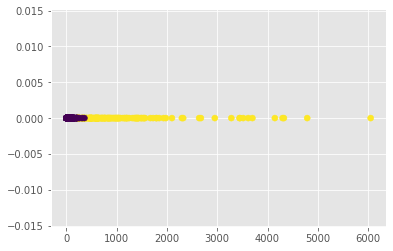

In [6]:
x = np.asarray(file.FramesInView)
y = np.zeros(len(x))
data = np.transpose(np.array([x,y]))
Manual_Label = np.asarray(file.TrialStatus)

plt.scatter(data[:,0],data[:,1], c = Manual_Label) #see what the data looks like

In [7]:
# build the linear classifier
clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(data,Manual_Label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
w = clf.coef_[0]
y0 = clf.intercept_

new_line = w[0]*data[:,0] - y0
new_line.shape

(573,)

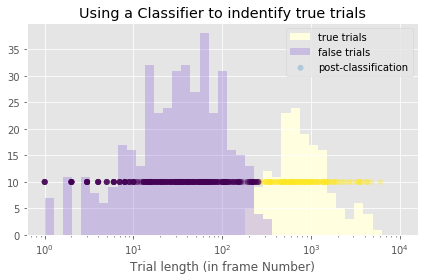

In [9]:
# see what the classifier did to the labels - find a way to draw a line along the "point" and draw "margin"

plt.hist(trueTrials, bins =10**np.linspace(0, 4, 40), color = 'lightyellow', label = 'true trials', zorder=0)
plt.hist(falseTrials, bins =10**np.linspace(0, 4, 40), color = 'mediumpurple', alpha=0.35, label = 'false trials', zorder=5)

annotation = []
for x,_ in data:
    YY = clf.predict([[x,0]])[0]
    annotation.append(YY)

plt.scatter(data[:,0],data[:,1]+10, c = annotation, 
            alpha=0.3, edgecolors='none', zorder=10, label = 'post-classification')
# plt.plot(new_line)
plt.xscale("log")
plt.yscale('linear')
plt.xlabel('Trial length (in frame Number)')
plt.title('Using a Classifier to indentify true trials')
plt.legend()
# plt.savefig(r'C:\Users\Daniellab\Desktop\Light_level_videos_c-10\Data\Step3\Annotation\Figuers_3.svg')
plt.tight_layout()

In [11]:
# run the predictor for all dataset and annotate them
direc = r'E:\Downloads\ManducaMultiSenseData\Step2'
new_path = r'E:\Downloads\ManducaMultiSenseData\Step3'

file = [file for file in os.listdir(direc) if file.endswith('.csv')]
# test = file[0]

for item in file:
    print(item)
    df = pd.read_csv(direc + '/' + item)
    label = []
    # run the classifer on this
    for xx in df.Frames_In_View:
        YY = clf.predict([[xx,0]])[0]
        label.append(YY)

    df1 = pd.DataFrame({'label': label})
    new_df = pd.concat([df, df1], axis = 1)
    new_df.to_csv(new_path + '/' + item[:-4] + '_labeled.csv')

L0.1_c-3_m10_MothInOut.csv
L0.1_c-3_m12_MothInOut.csv
L0.1_c-3_m20_MothInOut.csv
L0.1_c-3_m21_MothInOut.csv
L0.1_c-3_m22_MothInOut.csv
L0.1_c-3_m23_MothInOut.csv
L0.1_c-3_m24_MothInOut.csv
L0.1_c-3_m25_MothInOut.csv
L0.1_c-3_m27_MothInOut.csv
L0.1_c-3_m2_MothInOut.csv
L0.1_c-3_m32_MothInOut.csv
L0.1_c-3_m34_MothInOut.csv
L0.1_c-3_m37_MothInOut.csv
L0.1_c-3_m38_MothInOut.csv
L0.1_c-3_m39_MothInOut.csv
L0.1_c-3_m40_MothInOut.csv
L0.1_c-3_m41_MothInOut.csv
L0.1_c-3_m43_MothInOut.csv
L0.1_c-3_m44_MothInOut.csv
L0.1_c-3_m45_MothInOut.csv
L0.1_c-3_m46_MothInOut.csv
L0.1_c-3_m47_MothInOut.csv
L0.1_c-3_m48_MothInOut.csv
L0.1_c-3_m49_MothInOut.csv
L0.1_c-3_m50_MothInOut.csv
L0.1_c-3_m54_MothInOut.csv
L0.1_c-3_m57_MothInOut.csv
L0.1_c-3_m5_MothInOut.csv
L0.1_c-3_m8_MothInOut.csv
L50_c-3_m10_MothInOut.csv
L50_c-3_m12_MothInOut.csv
L50_c-3_m13_MothInOut.csv
L50_c-3_m14_MothInOut.csv
L50_c-3_m15_MothInOut.csv
L50_c-3_m21_MothInOut.csv
L50_c-3_m22_MothInOut.csv
L50_c-3_m24_MothInOut.csv
L50_c-3_m25_